## EDA(Exploratory Data Analysis)
<br>데이터 분석 초기에 이해를 높이기 위한 방법

# 

# Data Load

In [1]:
import pandas as pd
import config

In [2]:
df = pd.read_csv(config.data_path)

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 

# Missing Value

#### na 데이터 처리
missing value는 <b>제거, 평균, 중앙값, 최빈값 대체</b> 2가지 방법이 있음

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### na data check

In [8]:
na = df.isnull()
na_sum = na.sum() # series 형태
na_sum.sort_values(ascending=False, inplace=True)

print(na_sum)

#### na data percentage

In [9]:
na_percent = na.sum() / na.count()
na_percent = na_percent.sort_values(ascending=False)

In [10]:
print(na_percent)

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64


#### merge series into dataframe

In [11]:
missing_values = pd.DataFrame({"TOTAL" : na_sum,
                              "PERCENT" : na_percent})
print(missing_values.head())

             TOTAL   PERCENT
Cabin          687  0.771044
Age            177  0.198653
Embarked         2  0.002245
PassengerId      0  0.000000
Survived         0  0.000000


# 

## Drop column

In [12]:
origin_df = df.copy() 

In [13]:
df.drop("Cabin", axis=1, inplace=True)

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Replace nulls with Mean

In [15]:
age_mean = df['Age'].mean()
age_mean

29.69911764705882

In [16]:
df['Age'].fillna(age_mean, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Delete na row & column

In [19]:
df.dropna(axis=0, inplace=True) # Embarked를 기준으로 na 제거

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [21]:
df.reset_index(drop=True, inplace=True) # 인덱스를 새로 만들고 원래 인덱스는 제거

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# 

## 문자열 형식을 토대로 데이터를 가져와 새로운 컬럼 생성

In [23]:
title_column = origin_df['Name'].str.extract('([A-Za-z]+)\.', expand=False) # 영문자1개이상 + . 를 괄호 안 내용 추출 (호칭)
df['Title'] = title_column
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [24]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

# 

## Group by로 평균 계산하여 Age 평균 교체

In [25]:
age_means = df.groupby('Title')['Age'].mean()
age_means = age_means.to_dict()
age_means

{'Capt': 16.0,
 'Col': 40.84955882352941,
 'Countess': 29.69911764705882,
 'Don': 40.0,
 'Dr': 30.742731092436973,
 'Jonkheer': 27.0,
 'Lady': 29.69911764705882,
 'Major': 33.0,
 'Master': 25.050323529411767,
 'Miss': 28.882209114415012,
 'Mlle': 15.84955882352941,
 'Mme': 25.0,
 'Mr': 30.02479211878924,
 'Mrs': 30.939823529411754,
 'Ms': 29.69911764705882,
 'Rev': 26.233039215686272,
 'Sir': 24.0}

# 

In [26]:
# Age의 missing value를 전체평균으로 대체
# -> Age의 missing value를 Title별 평균으로 대체
df_copy = df.copy()
row_nan_age = df['Age'] == origin_df["Age"].mean()   # NaN이었던 행을 찾는 것
idx_nan_age = df[row_nan_age].index   # 찾은 행의 인덱스 가져오기

In [27]:
print(f"row_nan_age : {row_nan_age}")
print(f"idx_nan_age : {idx_nan_age}")

row_nan_age : 0      False
1      False
2      False
3      False
4      False
       ...  
884    False
885    False
886     True
887    False
888    False
Name: Age, Length: 889, dtype: bool
idx_nan_age : Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            830, 835, 837, 844, 847, 857, 861, 866, 876, 886],
           dtype='int64', length=177)


In [28]:
# loc으로 위치 찾아 map으로 교체
df['Title'].loc[idx_nan_age]
df['Title'].loc[idx_nan_age].map(age_means)

5      30.024792
17     30.024792
19     30.939824
26     30.024792
28     28.882209
         ...    
857    30.024792
861    30.024792
866    28.882209
876    30.024792
886    26.233039
Name: Title, Length: 177, dtype: float64

In [29]:
df.loc[idx_nan_age, 'Age'] = df['Title'].loc[idx_nan_age].map(age_means)   
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
5,6,0,3,"Moran, Mr. James",male,30.024792,0,0,330877,8.4583,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs


In [30]:
# Imputed 행으로 변경됐는지 확인
df['Imputed'] = 0
df.loc[idx_nan_age, 'Imputed'] = 1
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Imputed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,0
5,6,0,3,"Moran, Mr. James",male,30.024792,0,0,330877,8.4583,Q,Mr,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,Mr,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,Master,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,Mrs,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,Mrs,0


# 

# Seaborn 그래프 생성

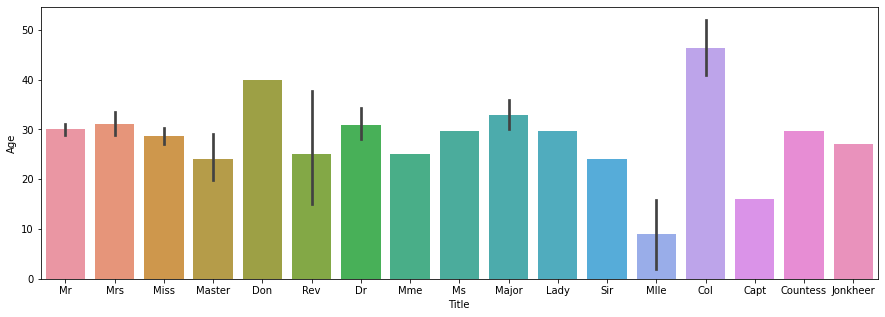

In [31]:
import seaborn as sns

plt.figure(figsize=(15, 5))   # figure 크기 지정
sns.barplot(x=df['Title'], y=df['Age'])   # Title별 평균 Age
plt.show() # 막대 위 줄은 오차범위를 의미

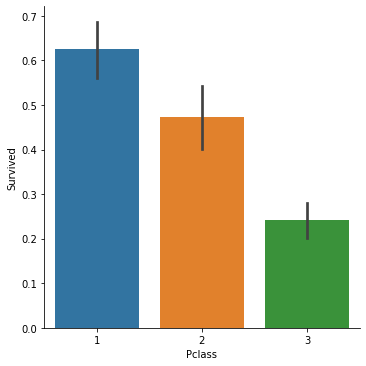

In [32]:
sns.catplot(data=df, x='Pclass', y='Survived', kind='bar')
plt.show()

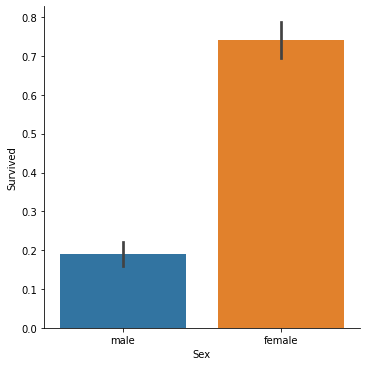

In [42]:
sns.catplot(data=df, x='Sex', y="Survived", kind='bar')
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


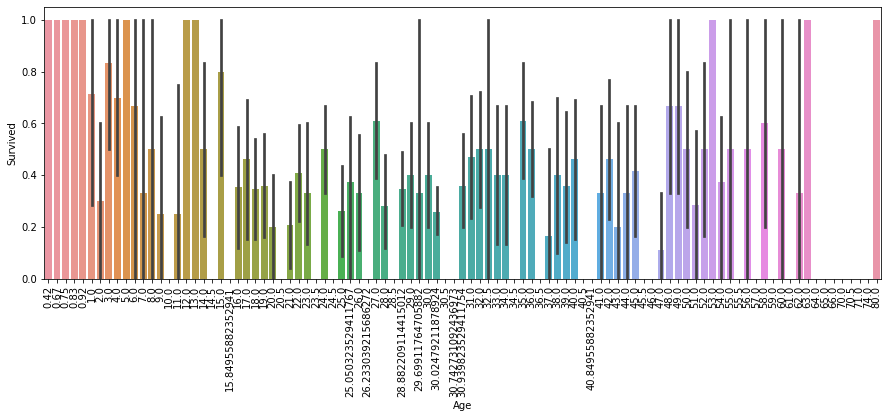

In [44]:
plt.figure(figsize=(15, 5))
sns.barplot(df['Age'], df["Survived"])
plt.xticks(rotation=90)
plt.show()

In [45]:
df['AgeGroup'] = pd.cut(df['Age'], 
                                   bins=[0, 15, 50, 200], 
                                   labels=['Child', 'Adult', 'Elder'])
df['AgeGroup'].head(10)

0    Adult
1    Adult
2    Adult
3    Adult
4    Adult
5    Adult
6    Elder
7    Child
8    Adult
9    Child
Name: AgeGroup, dtype: category
Categories (3, object): ['Child' < 'Adult' < 'Elder']

# 

## histogram

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


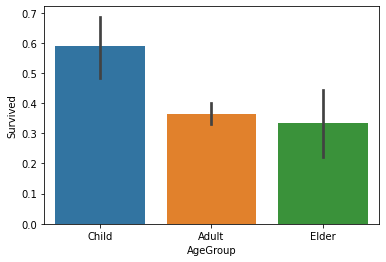

In [46]:
sns.barplot(df['AgeGroup'], df["Survived"])
plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


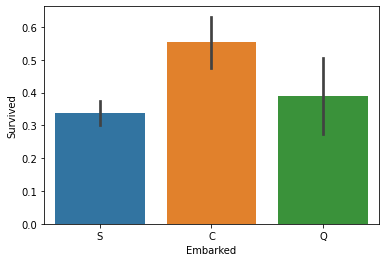

In [48]:
sns.barplot(df['Embarked'], df["Survived"])
plt.show()

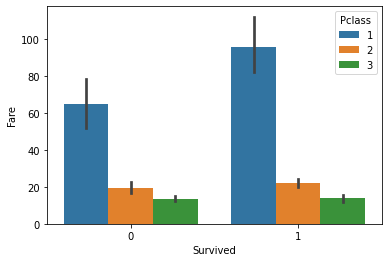

In [49]:
sns.barplot(x=df["Survived"], 
            y=df['Fare'], 
            hue=df['Pclass'])
plt.show()